In [7]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
import os
import shutil
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from sklearn.utils.class_weight import compute_class_weight
import numpy as np
from tensorflow.keras.applications import MobileNetV2
from PIL import UnidentifiedImageError

In [8]:
# df is the main kaggle database, train has the crop images, and the validation is more crop images used for validating the CNN
source_dirs = ['/Users/jacksonsorenson/Documents/Pyhton Projects/Agriculture/archive (12)/crop_images','/Users/jacksonsorenson/Documents/Pyhton Projects/Agriculture/archive (12)/some_more_images/some_more_images','/Users/jacksonsorenson/Documents/Pyhton Projects/Agriculture/archive (12)/some_more_images']

train_dir = 'train'

val_dir = 'validation'

In [9]:
# Create the train and validation directories
os.makedirs(train_dir, exist_ok=True)
os.makedirs(val_dir, exist_ok=True)

In [10]:


# Data Preprocessing
datagen = ImageDataGenerator(
    rescale=1.0/255,  # Normalize pixel values
    rotation_range=40,  # This and the lines below will help make our model more robust 
    width_shift_range=0.3,
    height_shift_range=0.3,
    shear_range=0.3,
    zoom_range=0.3,
    brightness_range=[0.8, 1.2],
    horizontal_flip=True
)

# Process each source directory. This is creating new syntetic data in order to make the model learn better as well as being able to split data into testing and training example.
for source_dir in source_dirs:
    for crop in os.listdir(source_dir):  # Iterate over crop categories
        crop_path = os.path.join(source_dir, crop)
        if os.path.isdir(crop_path):
            images = os.listdir(crop_path)
            os.makedirs(os.path.join(train_dir, crop), exist_ok=True)
            os.makedirs(os.path.join(val_dir, crop), exist_ok=True)

            # Split into train and validation sets
            train_images = images[:int(len(images) * 0.8)]
            val_images = images[int(len(images) * 0.8):]

            # Copy and augment training images
            for img_file in train_images:
                img_path = os.path.join(crop_path, img_file)
                if os.path.isfile(img_path):
                    try:
                        # Validate if the file is a valid image
                        img = tf.keras.utils.load_img(img_path)  # Try loading the image
                        x = tf.keras.utils.img_to_array(img)
                        x = x.reshape((1,) + x.shape)

                        # Save original and augmented images
                        shutil.copy(img_path, os.path.join(train_dir, crop))

                        i = 0
                        for batch in datagen.flow(x, batch_size=1,
                                                  save_to_dir=os.path.join(train_dir, crop),
                                                  save_prefix='aug',
                                                  save_format='jpeg'):
                            i += 1
                            if i > 5:  # Generate 5 augmented images per original image
                                break
                    except (UnidentifiedImageError, OSError) as e:
                        print(f"Skipping invalid image file: {img_file}")

            # Copy validation images
            for img_file in val_images:
                img_path = os.path.join(crop_path, img_file)
                if os.path.isfile(img_path):
                    try:
                        # Validate if the file is a valid image
                        img = tf.keras.utils.load_img(img_path)  # Try loading the image
                        shutil.copy(img_path, os.path.join(val_dir, crop))
                    except (UnidentifiedImageError, OSError) as e:
                        print(f"Skipping invalid image file: {img_file}")

print("Data augmentation and splitting complete.")


Skipping invalid image file: .DS_Store
Data augmentation and splitting complete.


In [11]:
def count_images(directory):
    for crop in os.listdir(directory):
        crop_path = os.path.join(directory, crop)
        if os.path.isdir(crop_path):
            num_images = len(os.listdir(crop_path))
            print(f"{crop}: {num_images} images in {directory}")

# Count images in train and validation directories
print("Training Data:")
count_images(train_dir)

print("\nValidation Data:")
count_images(val_dir)

Training Data:
sugarcane: 1267 images in train
rice: 1292 images in train
some_more_images: 1 images in train
wheat: 1283 images in train
jute: 1277 images in train
maize: 1267 images in train

Validation Data:
sugarcane: 47 images in validation
rice: 47 images in validation
some_more_images: 0 images in validation
wheat: 50 images in validation
jute: 48 images in validation
maize: 46 images in validation


Found 6386 images belonging to 6 classes.
Found 238 images belonging to 6 classes.
Epoch 1/30
199/199 ━━━━━━━━━━━━━━━━━━━━ 501s 3s/step - accuracy: 0.4740 - loss: 12.6882 - val_accuracy: 0.3750 - val_loss: 11.3421 - learning_rate: 1.0000e-04
Epoch 2/30
199/199 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5312 - loss: 10.9702 - val_accuracy: 0.5000 - val_loss: 11.2729 - learning_rate: 1.0000e-04
Epoch 3/30
199/199 ━━━━━━━━━━━━━━━━━━━━ 489s 2s/step - accuracy: 0.6867 - loss: 10.2416 - val_accuracy: 0.5625 - val_loss: 9.3650 - learning_rate: 1.0000e-04
Epoch 4/30
199/199 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.7812 - loss: 8.8396 - val_accuracy: 0.7857 - val_loss: 9.0953 - learning_rate: 1.0000e-04
Epoch 5/30


2025-01-16 18:13:44.850152: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence
	 [[{{node IteratorGetNext}}]]


199/199 ━━━━━━━━━━━━━━━━━━━━ 459s 2s/step - accuracy: 0.7597 - loss: 8.5109 - val_accuracy: 0.8170 - val_loss: 7.4425 - learning_rate: 1.0000e-04
Epoch 6/30
199/199 ━━━━━━━━━━━━━━━━━━━━ 2s 1ms/step - accuracy: 0.7500 - loss: 7.6162 - val_accuracy: 0.9286 - val_loss: 7.2129 - learning_rate: 1.0000e-04
Epoch 7/30
199/199 ━━━━━━━━━━━━━━━━━━━━ 477s 2s/step - accuracy: 0.8217 - loss: 7.1082 - val_accuracy: 0.8304 - val_loss: 6.2185 - learning_rate: 1.0000e-04
Epoch 8/30
199/199 ━━━━━━━━━━━━━━━━━━━━ 32s 147ms/step - accuracy: 0.6875 - loss: 6.5676 - val_accuracy: 0.7143 - val_loss: 6.2315 - learning_rate: 1.0000e-04
Epoch 9/30
199/199 ━━━━━━━━━━━━━━━━━━━━ 521s 3s/step - accuracy: 0.8625 - loss: 5.9566 - val_accuracy: 0.9152 - val_loss: 5.1536 - learning_rate: 1.0000e-04
Epoch 10/30
199/199 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8750 - loss: 5.3526 - val_accuracy: 0.9286 - val_loss: 5.0455 - learning_rate: 1.0000e-04
Epoch 11/30
199/199 ━━━━━━━━━━━━━━━━━━━━ 481s 2s/step - accuracy: 0.

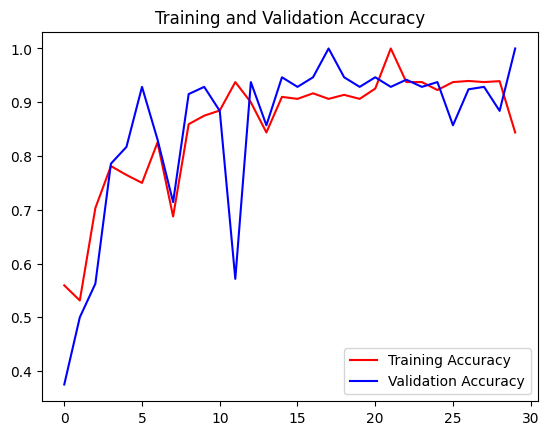

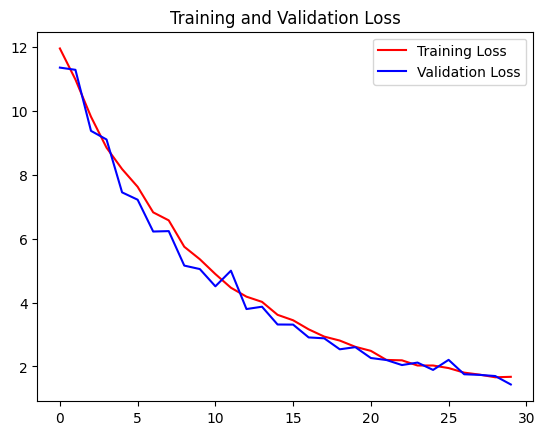

In [12]:

# Validation and Train Data generators
val_datagen = ImageDataGenerator(rescale=1.0/255)
train_datagen = ImageDataGenerator(rescale=1.0/255)

# Loading in the Data
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(224, 224),  # Resize images to 224
    batch_size=32,
    class_mode='categorical'  # For multiclass classification
)
# Loading in Validation Data
val_generator = val_datagen.flow_from_directory(
    val_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical'
)

# Building the actual model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), input_shape=(224, 224, 3),kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (3, 3), kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(128, (3, 3),kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    layers.BatchNormalization(),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(256, (3, 3), kernel_regularizer=tf.keras.regularizers.l2(0.01)),  # New added layer
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(512, (3, 3), kernel_regularizer=tf.keras.regularizers.l2(0.01)),  # New added layer (not optimal)
    layers.BatchNormalization(),
    layers.Activation('relu'),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    layers.Dense(256, activation='relu',kernel_regularizer=tf.keras.regularizers.l2(0.01)),
    layers.Dropout(0.4), # Trying lower dropout rate
    layers.Dense(train_generator.num_classes, activation='softmax',kernel_regularizer=tf.keras.regularizers.l2(0.01))  # Output layer
])

# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Add Callbacks
callbacks = [
    ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=0.00001, verbose=1),
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True, verbose=1)
]


# Train the Model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=30,
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size,
    callbacks=callbacks
)

# Plot Training History
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.figure()
plt.plot(epochs, acc, 'r', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()

plt.figure()
plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.show()